### 使用VGG16的结构提取图像特征，再根据特征建立mlp模型，实现猫狗图像识别。训练/测试数据：dataset\data_vgg：
#### 1.对数据进行分离、计算测试数据预测准确率
#### 2.从网站下载猫/狗图片，对其进行预测
#### mlp模型一个隐藏层，10个神经元

In [5]:
from keras.preprocessing.image import load_img,img_to_array

img_path='1.jpg'
img=load_img(img_path,target_size=(224,224))
img=img_to_array(img)
print(img[0].shape)

(224, 3)


In [9]:
# 模型导入
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np

model_vgg=VGG16(weights='imagenet',include_top=False)
x=np.expand_dims(img,axis=0)
print(x[0].shape)
x=preprocess_input(x)
print(x.shape)

(224, 224, 3)
(1, 224, 224, 3)


In [11]:
#特征提取
features=model_vgg.predict(x)
print(features.shape)

(1, 7, 7, 512)


In [12]:
# flatten
features=features.reshape(1,7*7*512)
print(features.shape)

(1, 25088)


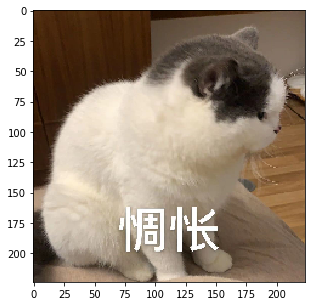

In [13]:
#visualize the data
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(5,5))
img = load_img(img_path,target_size=(224,224))
plt.imshow(img)

In [14]:
#load image and preprocess it with vgg16 structure
#--by flare
from keras.preprocessing.image import img_to_array,load_img
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np

model_vgg = VGG16(weights='imagenet', include_top=False)
#define a method to load and preprocess the image
def modelProcess(img_path,model):
    img = load_img(img_path, target_size=(224, 224))
    img = img_to_array(img)
    x = np.expand_dims(img,axis=0)
    x = preprocess_input(x)
    x_vgg = model.predict(x)
    x_vgg = x_vgg.reshape(1,25088)
    return x_vgg
#list file names of the training datasets
import os
folder = "dataset/data_vgg/cats"
dirs = os.listdir(folder)
#generate path for the images
img_path = []
for i in dirs:                             
    if os.path.splitext(i)[1] == ".jpg":   
        img_path.append(i)
img_path = [folder+"//"+i for i in img_path]

#preprocess multiple images
features1 = np.zeros([len(img_path),25088])
for i in range(len(img_path)):
    feature_i = modelProcess(img_path[i],model_vgg)
    print('preprocessed:',img_path[i])
    features1[i] = feature_i
    
folder = "dataset/data_vgg/dogs"
dirs = os.listdir(folder)
img_path = []
for i in dirs:                             
    if os.path.splitext(i)[1] == ".jpg":   
        img_path.append(i)
img_path = [folder+"//"+i for i in img_path]
features2 = np.zeros([len(img_path),25088])
for i in range(len(img_path)):
    feature_i = modelProcess(img_path[i],model_vgg)
    print('preprocessed:',img_path[i])
    features2[i] = feature_i
    
#label the results
print(features1.shape,features2.shape)
y1 = np.zeros(300)
y2 = np.ones(300)

#generate the training data
X = np.concatenate((features1,features2),axis=0)
y = np.concatenate((y1,y2),axis=0)
y = y.reshape(-1,1)
print(X.shape,y.shape)

preprocessed: dataset/data_vgg/cats//cat.1.jpg
preprocessed: dataset/data_vgg/cats//cat.10.jpg
preprocessed: dataset/data_vgg/cats//cat.100.jpg
preprocessed: dataset/data_vgg/cats//cat.101.jpg
preprocessed: dataset/data_vgg/cats//cat.102.jpg
preprocessed: dataset/data_vgg/cats//cat.103.jpg
preprocessed: dataset/data_vgg/cats//cat.104.jpg
preprocessed: dataset/data_vgg/cats//cat.105.jpg
preprocessed: dataset/data_vgg/cats//cat.106.jpg
preprocessed: dataset/data_vgg/cats//cat.107.jpg
preprocessed: dataset/data_vgg/cats//cat.108.jpg
preprocessed: dataset/data_vgg/cats//cat.109.jpg
preprocessed: dataset/data_vgg/cats//cat.11.jpg
preprocessed: dataset/data_vgg/cats//cat.110.jpg
preprocessed: dataset/data_vgg/cats//cat.111.jpg
preprocessed: dataset/data_vgg/cats//cat.112.jpg
preprocessed: dataset/data_vgg/cats//cat.113.jpg
preprocessed: dataset/data_vgg/cats//cat.114.jpg
preprocessed: dataset/data_vgg/cats//cat.115.jpg
preprocessed: dataset/data_vgg/cats//cat.116.jpg
preprocessed: dataset/da

preprocessed: dataset/data_vgg/cats//cat.250.jpg
preprocessed: dataset/data_vgg/cats//cat.251.jpg
preprocessed: dataset/data_vgg/cats//cat.252.jpg
preprocessed: dataset/data_vgg/cats//cat.253.jpg
preprocessed: dataset/data_vgg/cats//cat.254.jpg
preprocessed: dataset/data_vgg/cats//cat.255.jpg
preprocessed: dataset/data_vgg/cats//cat.256.jpg
preprocessed: dataset/data_vgg/cats//cat.257.jpg
preprocessed: dataset/data_vgg/cats//cat.258.jpg
preprocessed: dataset/data_vgg/cats//cat.259.jpg
preprocessed: dataset/data_vgg/cats//cat.26.jpg
preprocessed: dataset/data_vgg/cats//cat.260.jpg
preprocessed: dataset/data_vgg/cats//cat.261.jpg
preprocessed: dataset/data_vgg/cats//cat.262.jpg
preprocessed: dataset/data_vgg/cats//cat.263.jpg
preprocessed: dataset/data_vgg/cats//cat.264.jpg
preprocessed: dataset/data_vgg/cats//cat.265.jpg
preprocessed: dataset/data_vgg/cats//cat.266.jpg
preprocessed: dataset/data_vgg/cats//cat.267.jpg
preprocessed: dataset/data_vgg/cats//cat.268.jpg
preprocessed: dataset

preprocessed: dataset/data_vgg/dogs//dog.133.jpg
preprocessed: dataset/data_vgg/dogs//dog.134.jpg
preprocessed: dataset/data_vgg/dogs//dog.135.jpg
preprocessed: dataset/data_vgg/dogs//dog.136.jpg
preprocessed: dataset/data_vgg/dogs//dog.137.jpg
preprocessed: dataset/data_vgg/dogs//dog.138.jpg
preprocessed: dataset/data_vgg/dogs//dog.139.jpg
preprocessed: dataset/data_vgg/dogs//dog.14.jpg
preprocessed: dataset/data_vgg/dogs//dog.140.jpg
preprocessed: dataset/data_vgg/dogs//dog.141.jpg
preprocessed: dataset/data_vgg/dogs//dog.142.jpg
preprocessed: dataset/data_vgg/dogs//dog.143.jpg
preprocessed: dataset/data_vgg/dogs//dog.144.jpg
preprocessed: dataset/data_vgg/dogs//dog.145.jpg
preprocessed: dataset/data_vgg/dogs//dog.146.jpg
preprocessed: dataset/data_vgg/dogs//dog.147.jpg
preprocessed: dataset/data_vgg/dogs//dog.148.jpg
preprocessed: dataset/data_vgg/dogs//dog.149.jpg
preprocessed: dataset/data_vgg/dogs//dog.15.jpg
preprocessed: dataset/data_vgg/dogs//dog.150.jpg
preprocessed: dataset/

preprocessed: dataset/data_vgg/dogs//dog.285.jpg
preprocessed: dataset/data_vgg/dogs//dog.286.jpg
preprocessed: dataset/data_vgg/dogs//dog.287.jpg
preprocessed: dataset/data_vgg/dogs//dog.288.jpg
preprocessed: dataset/data_vgg/dogs//dog.289.jpg
preprocessed: dataset/data_vgg/dogs//dog.29.jpg
preprocessed: dataset/data_vgg/dogs//dog.290.jpg
preprocessed: dataset/data_vgg/dogs//dog.291.jpg
preprocessed: dataset/data_vgg/dogs//dog.292.jpg
preprocessed: dataset/data_vgg/dogs//dog.293.jpg
preprocessed: dataset/data_vgg/dogs//dog.294.jpg
preprocessed: dataset/data_vgg/dogs//dog.295.jpg
preprocessed: dataset/data_vgg/dogs//dog.296.jpg
preprocessed: dataset/data_vgg/dogs//dog.297.jpg
preprocessed: dataset/data_vgg/dogs//dog.298.jpg
preprocessed: dataset/data_vgg/dogs//dog.299.jpg
preprocessed: dataset/data_vgg/dogs//dog.3.jpg
preprocessed: dataset/data_vgg/dogs//dog.30.jpg
preprocessed: dataset/data_vgg/dogs//dog.300.jpg
preprocessed: dataset/data_vgg/dogs//dog.31.jpg
preprocessed: dataset/dat

In [15]:
#split the training and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=50)
print(X_train.shape,X_test.shape,X.shape)

C:\Users\pactera\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\pactera\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\pactera\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


(420, 25088) (180, 25088) (600, 25088)


C:\Users\pactera\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [16]:
from keras.models import Sequential
from keras.layers import Dense

model=Sequential()
model.add(Dense(units=10,activation='relu',input_dim=25088))
model.add(Dense(units=1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                250890    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 250,901
Trainable params: 250,901
Non-trainable params: 0
_________________________________________________________________


In [17]:
#configure the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#train the model
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
420/420 [==============================] - 0s 703us/step - loss: 2.1955 - accuracy: 0.6310
Epoch 2/50
420/420 [==============================] - 0s 349us/step - loss: 0.2964 - accuracy: 0.8881
Epoch 3/50
420/420 [==============================] - 0s 351us/step - loss: 0.1607 - accuracy: 0.9429
Epoch 4/50
420/420 [==============================] - 0s 385us/step - loss: 0.1251 - accuracy: 0.9429
Epoch 5/50
420/420 [==============================] - 0s 344us/step - loss: 0.1807 - accuracy: 0.9429
Epoch 6/50
420/420 [==============================] - 0s 359us/step - loss: 0.1132 - accuracy: 0.9619
Epoch 7/50
420/420 [==============================] - 0s 366us/step - loss: 0.0515 - accuracy: 0.9667
Epoch 8/50
420/420 [==============================] - 0s 351us/step - loss: 0.1342 - accuracy: 0.9667
Epoch 9/50
420/420 [==============================] - 0s 404us/step - loss: 0.0523 - accuracy: 0.9667
Epoch 10/50
420/420 [==============================] - 0s 420us/step - loss: 0.054

In [18]:
from sklearn.metrics import accuracy_score
y_train_predict = model.predict_classes(X_train)
accuracy_train = accuracy_score(y_train,y_train_predict)
print(accuracy_train)

0.9857142857142858


In [19]:
#测试准确率
y_test_predict = model.predict_classes(X_test)
accuracy_test = accuracy_score(y_test,y_test_predict)
print(accuracy_test)

0.9333333333333333


In [20]:
img_path = 'cat1.jpg'
img = load_img(img_path,target_size=(224,224))
img = img_to_array(img)
x = np.expand_dims(img,axis=0)
x = preprocess_input(x)
features = model_vgg.predict(x)
features = features.reshape(1,7*7*512)
result = model.predict_classes(features)
print(result)

[[0]]


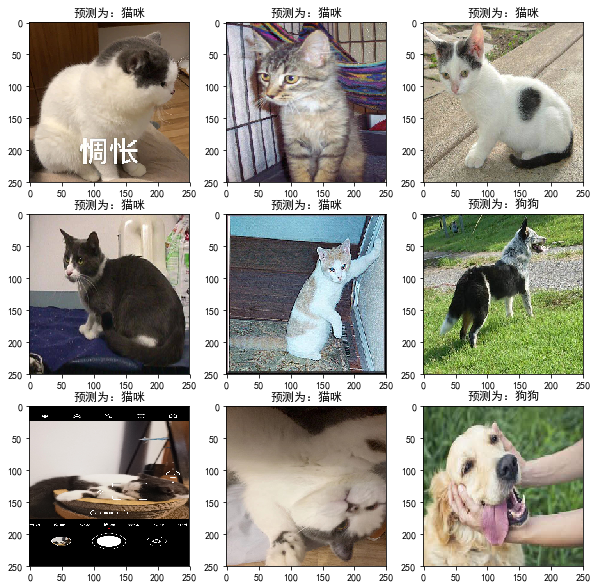

In [21]:
# coding:utf-8
import matplotlib as mlp
font2 = {'family' : 'SimHei',
'weight' : 'normal',
'size'   : 20,
}
mlp.rcParams['font.family'] = 'SimHei'
mlp.rcParams['axes.unicode_minus'] = False
from matplotlib import pyplot as plt
from matplotlib.image import imread
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
#from cv2 import load_img
a = [i for i in range(1,10)]
fig = plt.figure(figsize=(10,10))
for i in a:
    img_name = str(i)+'.jpg'
    img_path = img_name
    img = load_img(img_path, target_size=(224, 224))
    img = img_to_array(img)
    x = np.expand_dims(img,axis=0)
    x = preprocess_input(x)
    x_vgg = model_vgg.predict(x)
    x_vgg = x_vgg.reshape(1,25088)
    result = model.predict_classes(x_vgg)
    img_ori = load_img(img_name, target_size=(250, 250))
    plt.subplot(3,3,i)
    plt.imshow(img_ori)
    plt.title('预测为：狗狗' if result[0][0] == 1 else '预测为：猫咪')
plt.show()